Loading the Saved Data and Trained Models

In [ ]:
import tensorflow as tf
import pickle

file_names_preprocessing = ['original', 'grayscale', 'threshold', 'sobel']
file_names_amount = [256, 512, 1024, 2048, 4300]

# 1. Loading Models for the preprocessed images
dumped_data_preprocessing = {}

for extension in file_names_preprocessing:
    with open('Trained Models//dumped_data_' + extension + '.pickle', 'rb') as file:
        dumped_data_preprocessing[extension] = pickle.load(file)


# 2. Loading Models for the different amount of images
dumped_data_amount = {}

for extension in file_names_amount:
    with open('Trained Models//dumped_data_' + str(extension) + '.pickle', 'rb') as file:
        dumped_data_amount[str(extension)] = pickle.load(file)

## 1. Preprocessing

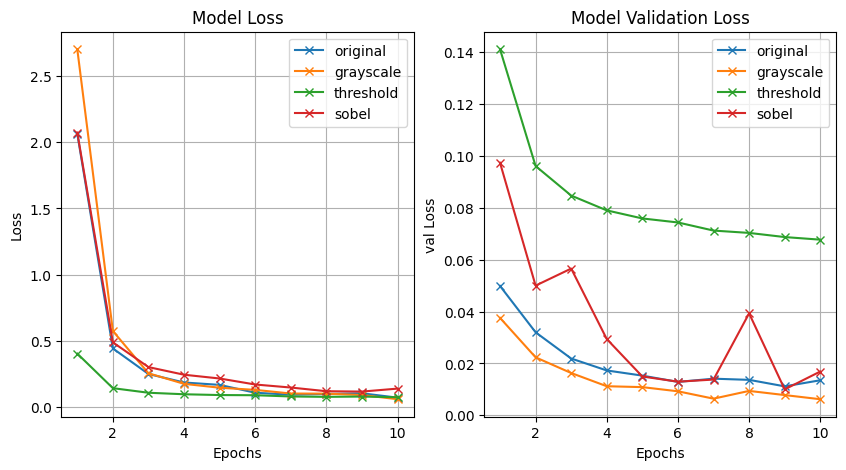

In [42]:
import matplotlib.pyplot as plt

fig, (axis_loss, axis_val_loss) = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

epochs = range(1, 11) # Corresponds to 10 epochs

for extension in file_names_preprocessing:
    axis_loss.plot(epochs, dumped_data_preprocessing[extension]['history']['loss'], marker='x', label=extension)
    axis_val_loss.plot(epochs, dumped_data_preprocessing[extension]['history']['val_loss'], marker='x', label=extension)

axis_loss.legend(), axis_loss.grid(), axis_loss.set_title('Model Loss');
axis_val_loss.legend(), axis_val_loss.grid(), axis_val_loss.set_title('Model Validation Loss');

axis_loss.set_xlabel('Epochs'), axis_loss.set_ylabel('Loss');
axis_val_loss.set_xlabel('Epochs'), axis_val_loss.set_ylabel('val Loss');

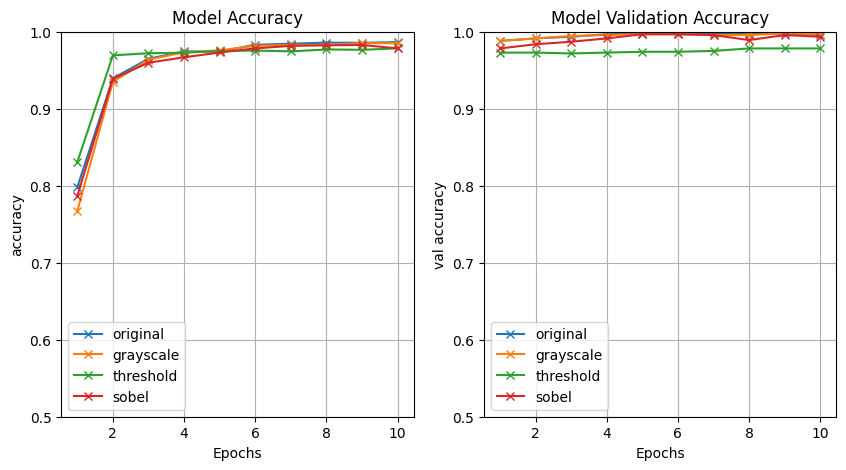

In [41]:
fig, (axis_acc, axis_val_acc) = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

epochs = range(1, 11) # Corresponds to 10 epochs

for extension in file_names_preprocessing:
    axis_acc.plot(epochs, dumped_data_preprocessing[extension]['history']['accuracy'], marker='x', label=extension)
    axis_val_acc.plot(epochs, dumped_data_preprocessing[extension]['history']['val_accuracy'], marker='x', label=extension)

axis_acc.legend(),     axis_acc.grid(),       axis_acc.set_ylim([0.5, 1.0]),     axis_acc.set_title('Model Accuracy');
axis_val_acc.legend(), axis_val_acc.grid(),   axis_val_acc.set_ylim([0.5, 1.0]), axis_val_acc.set_title('Model Validation Accuracy');

axis_acc.set_xlabel('Epochs'), axis_acc.set_ylabel('accuracy');
axis_val_acc.set_xlabel('Epochs'), axis_val_acc.set_ylabel('val accuracy');

## 1. Number of Images

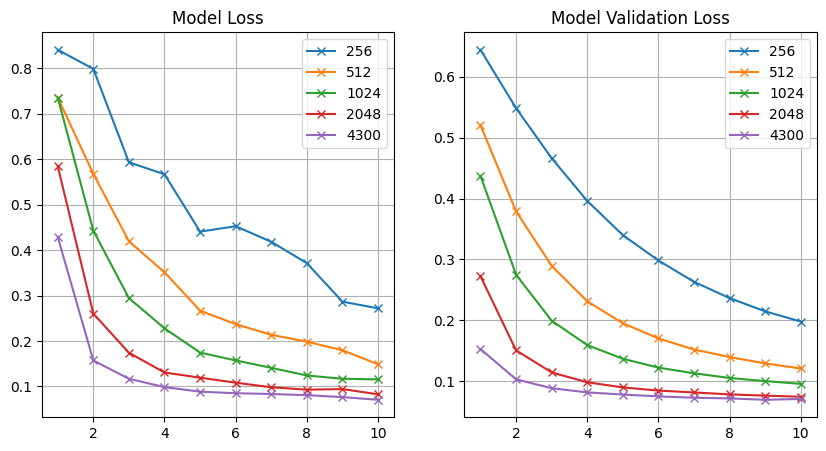

In [28]:
fig, (axis_loss, axis_val_loss) = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

epochs = range(1, 11) # Corresponds to 10 epochs

for extension in file_names_amount:
    axis_loss.plot(epochs, dumped_data_amount[str(extension)]['history']['loss'], marker='x', label=str(extension))
    axis_val_loss.plot(epochs, dumped_data_amount[str(extension)]['history']['val_loss'], marker='x', label=str(extension))


axis_loss.legend(),     axis_loss.grid(),      axis_loss.set_title('Model Loss');
axis_val_loss.legend(), axis_val_loss.grid(),  axis_val_loss.set_title('Model Validation Loss');

axis_loss.set_xlabel('Epochs'), axis_loss.set_ylabel('Loss');
axis_val_loss.set_xlabel('Epochs'), axis_val_loss.set_ylabel('val Loss');

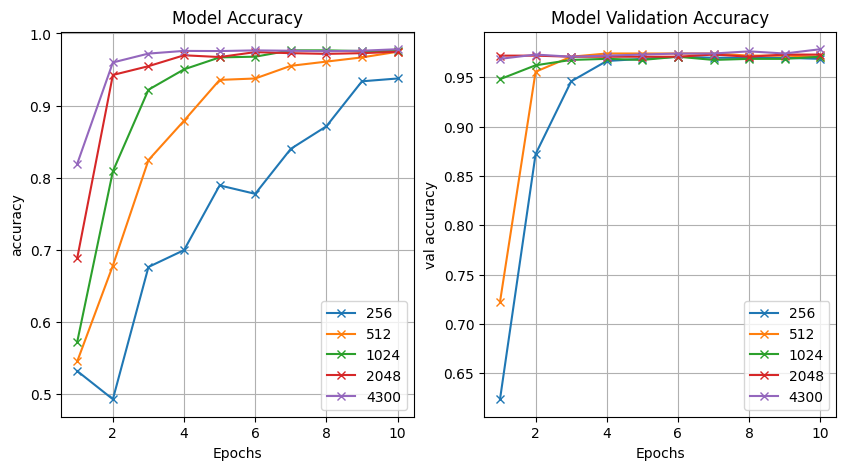

In [40]:
fig, (axis_acc, axis_val_acc) = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

epochs = range(1, 11) # Corresponds to 10 epochs

for extension in file_names_amount:
    axis_acc.plot(epochs, dumped_data_amount[str(extension)]['history']['accuracy'], marker='x', label=str(extension))
    axis_val_acc.plot(epochs, dumped_data_amount[str(extension)]['history']['val_accuracy'], marker='x', label=str(extension))


axis_acc.legend(),     axis_acc.grid(),      axis_acc.set_title('Model Accuracy');
axis_val_acc.legend(), axis_val_acc.grid(),  axis_val_acc.set_title('Model Validation Accuracy');

axis_acc.set_xlabel('Epochs'), axis_acc.set_ylabel('accuracy');
axis_val_acc.set_xlabel('Epochs'), axis_val_acc.set_ylabel('val accuracy');

## 3. Execution time

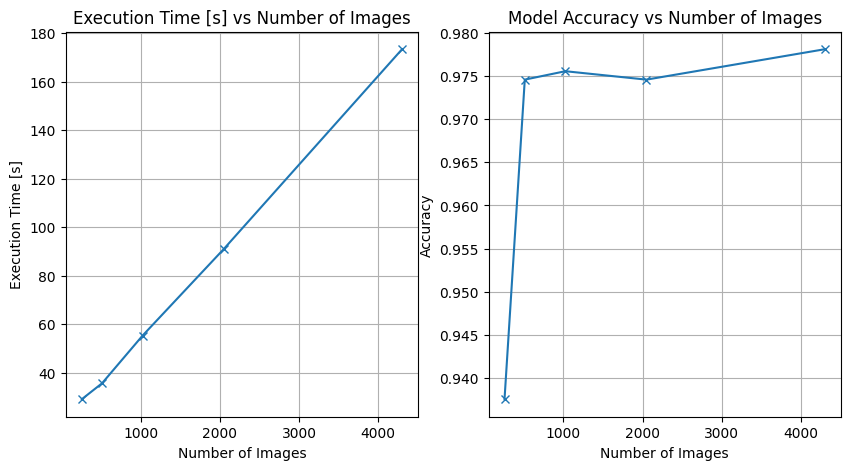

In [38]:
execution_time_array_amount = [29.15678334236145, 35.732768535614014, 55.38185429573059, 91.00420618057251, 173.36359858512878]

# Obtaining the final accuracy after training:
final_accuracy = []
for extension in file_names_amount:
    final_accuracy.append(dumped_data_amount[str(extension)]['history']['accuracy'][-1])



fig, (axis_exec_time, axis_acc) = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))


axis_exec_time.plot(file_names_amount, execution_time_array_amount, marker='x')
axis_acc.plot(file_names_amount, final_accuracy, marker='x')


axis_exec_time.grid(),  axis_exec_time.set_xlabel('Number of Images'),  axis_exec_time.set_ylabel('Execution Time [s]'),        axis_exec_time.set_title('Execution Time [s] vs Number of Images');
axis_acc.grid(),        axis_acc.set_xlabel('Number of Images'),        axis_acc.set_ylabel('Accuracy'),                        axis_acc.set_title('Model Accuracy vs Number of Images');


## Confusion Matrix

In [34]:
from sklearn.metrics import confusion_matrix
import numpy as np
tf.get_logger().setLevel('ERROR')

# Predict using the model on the test set
original_model = tf.keras.models.load_model('Trained Models//model_CNN_original')

with open('Trained Models//dumped_data_original.pickle', 'rb') as file:
    dumped_data = pickle.load(file)

    X_test = dumped_data['test_set'][0]
    y_test = dumped_data['test_set'][1]


y_pred = original_model.predict(X_test)
y_pred = y_pred > 0.5
y_pred = y_pred.ravel().astype('int')
y_test = y_test

# # Compute confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrices = confusion_matrix(y_test, y_pred)
print(confusion_matrices)

29/29 [==============================] - 3s 101ms/step
[[460   1]
 [  2 459]]


In [35]:
# Identify misclassified samples
well_classified_indices = np.where(y_test == y_pred)[0]
print(f"Correctly predicted: {len(well_classified_indices)} out of {len(y_test)}.")

Correctly predicted: 919 out of 922.


## Missclassified

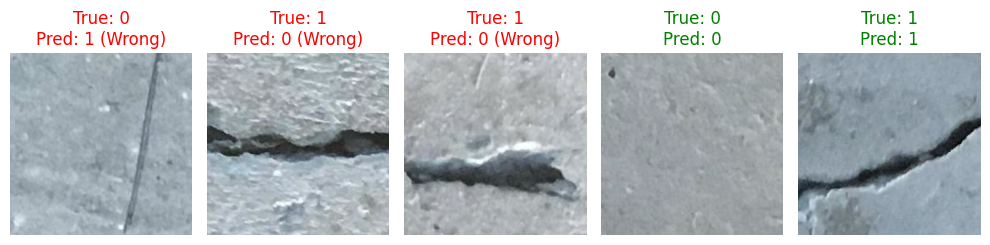

In [37]:
# Identify misclassified samples
misclassified_indices = np.where(y_test != y_pred)[0]

# Select five samples: include two misclassified and three correctly classified
correct_indices = np.where(y_test == y_pred)[0]
selected_indices = list(misclassified_indices[:3]) + list(correct_indices[:2])

# Plot the images
plt.figure(figsize=(10, 5))
for i, idx in enumerate(selected_indices):
    plt.subplot(1, 5, i + 1)
    plt.imshow(X_test[idx], cmap='gray')  # Assuming grayscale images
    title = f"True: {y_test[idx]}\nPred: {y_pred[idx]}"

    if idx in misclassified_indices:
        title += " (Wrong)"
        plt.gca().set_title(title, color='red')
    
    else:
        plt.gca().set_title(title, color='green')
    
    plt.axis('off')

plt.tight_layout()
plt.show()